In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('Train_Loan_Home.csv')
test_df = pd.read_csv('Test_Loan_Home.csv')

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Four column names are different in the Training and Testing sets and so they will be renamed in the Test set to sync with Train set.

In [5]:
ren_col = {'ApplicantIncomeMonthly':'ApplicantIncome', 'CoapplicantIncomeMonthly':'CoapplicantIncome',
          'LoanAmountThousands':'LoanAmount', 'Loan_Amount_Term_Months':'Loan_Amount_Term'}
test_df.rename(ren_col, axis = 1, inplace=True)

In [6]:
test_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [7]:
print("Shape of Train Set: {}".format(train_df.shape))
print("Shape of Test Set: {}".format(test_df.shape))

Shape of Train Set: (614, 13)
Shape of Test Set: (367, 12)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


#### Checking for null values 

Null values in Train Set: Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


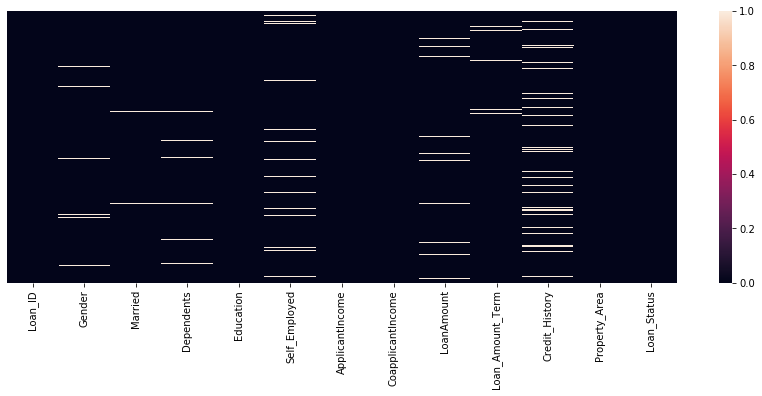

In [9]:
print('Null values in Train Set: {}'.format(train_df.isnull().sum()))

plt.figure(figsize=(15,5))
sns.heatmap(train_df.isnull(), yticklabels=False)

In [10]:
print('Null values in Test Set: {}'.format(test_df.isnull().sum()))

Null values in Test Set: Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


#### Lots of Null values exist in both the categorical and numerical  features which will be handled later.

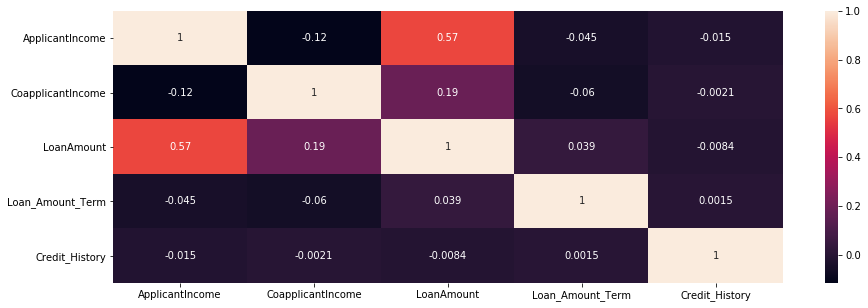

In [11]:
## Checking for feature correlation
plt.figure(figsize=(15,5))
sns.heatmap(train_df.corr(), annot=True)

### Statistics for numerical features in the  train set

In [12]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Statistics for categorical features in the train set 

In [13]:
train_df.describe(include=['O'])            #To select pandas categorical columns, pass include=['O'] as describe() arg.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001318,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Exploratory Data Analysis

### Feature: Loan_Status 

In [14]:
train_df["Loan_Status"].count()

614

In [15]:
train_df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
# If normalize is set to True, proportion will be printed instead of number 
train_df["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

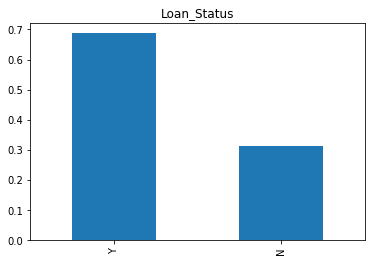

In [17]:
lsp = train_df["Loan_Status"].value_counts(normalize=True)
lsp.plot.bar(title='Loan_Status')


#### Out of 614 people, around 69% of people have got loans approval. 

### Feature: Gender 

In [18]:
train_df['Gender'].count()    

601

In [19]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [20]:
train_df['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

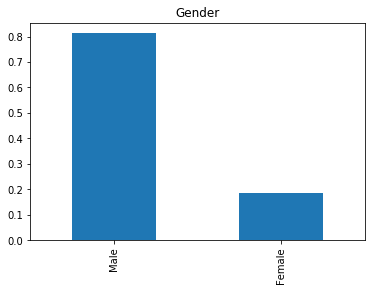

In [21]:
gp = train_df["Gender"].value_counts(normalize=True)
gp.plot.bar(title='Gender')

#### Around 81% people are Male and 18% are Female in the Train set.

### Feature: Married 

In [22]:
train_df['Married'].count()

611

In [23]:
train_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [24]:
train_df['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

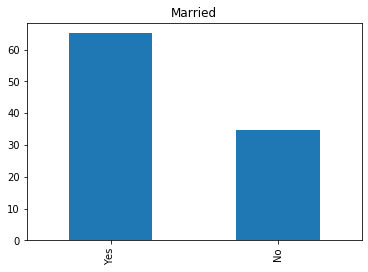

In [25]:
mp = train_df['Married'].value_counts(normalize=True)*100
mp.plot.bar(title='Married')

#### Around 65% of the people are married and 35% are unmarried in the Training set. 

### Feature: Dependents

In [26]:
train_df['Dependents'].count()

599

In [27]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [28]:
train_df['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

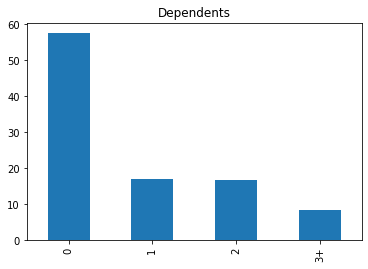

In [29]:
dp = train_df['Dependents'].value_counts(normalize=True)*100
dp.plot.bar(title='Dependents')

#### Around 58% of the people have no dependents, 17% of the people have 1 dependent, around 16% have 2 dependents, and 8.5% have more than 3 dependents in the Training Set. 

### Feature: Education 

In [30]:
train_df['Education'].count()

614

In [31]:
train_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [32]:
train_df['Education'].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

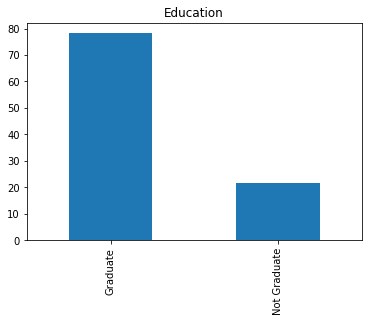

In [33]:
ep = train_df['Education'].value_counts(normalize=True)*100
ep.plot.bar(title='Education')

#### Around 78% of the people are Graduates and around 22% are not Graduates in the training set. 

### Feature: Self_Employed

In [34]:
train_df['Self_Employed'].count()

582

In [35]:
train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [36]:
sep = train_df['Self_Employed'].value_counts(normalize=True)*100
sep

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

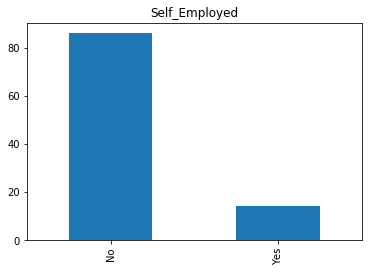

In [37]:
sep.plot.bar(title="Self_Employed")

#### Around 86% of the people are Not Self employed - they might be in service. Around 14% of the people are self employed as per the training set.

### Feature: Property_Area

In [38]:
train_df['Property_Area'].count()

614

In [39]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [40]:
pap = train_df['Property_Area'].value_counts(normalize=True)*100
pap

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

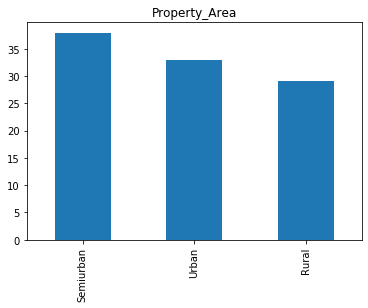

In [41]:
pap.plot.bar(title='Property_Area')

### Around 38% people live in semi-urban area, around 33% in urban area and around 29% in rural area. 

### Feature: Credit_History 

In [42]:
train_df['Credit_History'].count()

564

In [43]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [44]:
chp = train_df['Credit_History'].value_counts(normalize=True)*100
chp

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

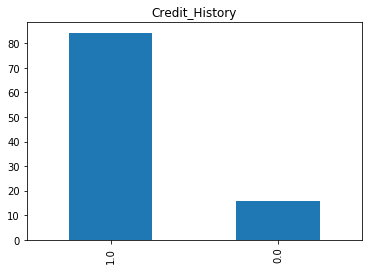

In [45]:
chp.plot.bar(title='Credit_History')

#### Around 84% people have repaid their Loans while around 16% have not repaid their loans. 

### Numerical Features

### Feature: ApplicantIncome

In [46]:
train_df['ApplicantIncome'].count()

614

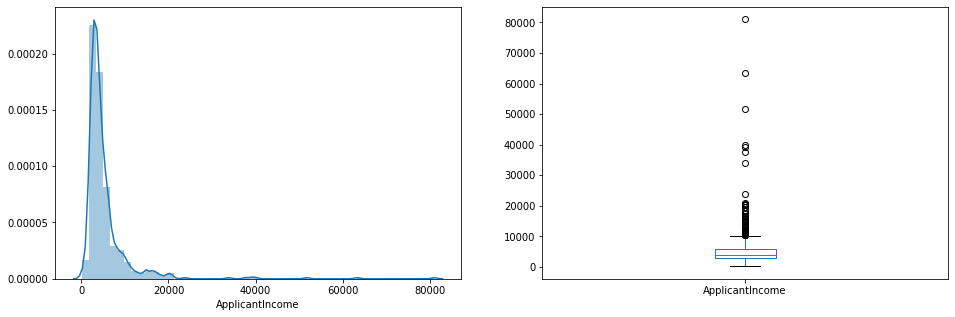

In [47]:
#plt.figure(figsize=(12,5))
# fig, ax = plt.subplots(1,2)

# ax1 = fig.add_subplot(1,2,1)
# sns.distplot(train_df["ApplicantIncome"])

# ax2 = fig.add_subplot(1,2,2)
#sns.boxplot(train_df["ApplicantIncome"], orient="v")

plt.subplot(1,2,1)
sns.distplot(train_df["ApplicantIncome"]);

plt.subplot(1,2,2)
train_df["ApplicantIncome"].plot.box(figsize=(16,5))

#### The distplot for ApplicantIncome in the above - left figure is not normally distributed. This will be handled to make it normal later.
#### The boxplot in the above - right for ApplicantIncome also displays the present of outliers. Maybe, this is because different people have different incomes. 
#### The Education feature might have some influence in it. Lets see whether there is any relation between Education and ApplicantIncome.

Text(0.5, 0.98, ' ')

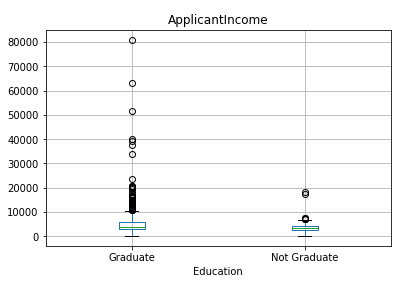

In [48]:
train_df.boxplot(column='ApplicantIncome',by="Education")
plt.suptitle(" ")

#### Graduates tend to have higher income compared to Non Graduates.

### Feature: CoapplicantIncome 

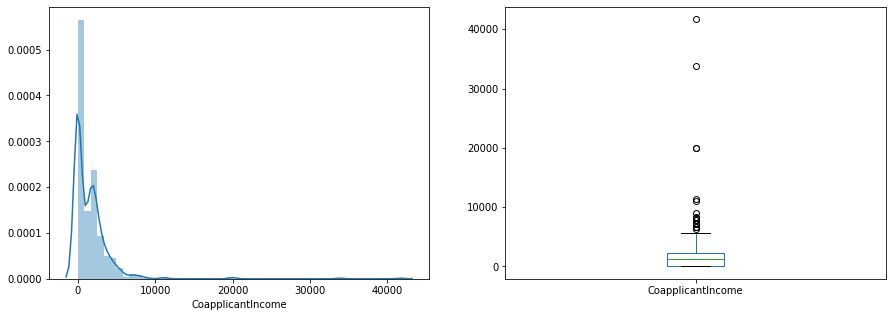

In [49]:
plt.subplot(1,2,1)
sns.distplot(train_df["CoapplicantIncome"]);

plt.subplot(1,2,2)
train_df["CoapplicantIncome"].plot.box(figsize=(15,5))

#### Both the figures above displays the presence of outliers and the distribution of the Coapplicantincome is also not normal.

### Feature: LoanAmount 

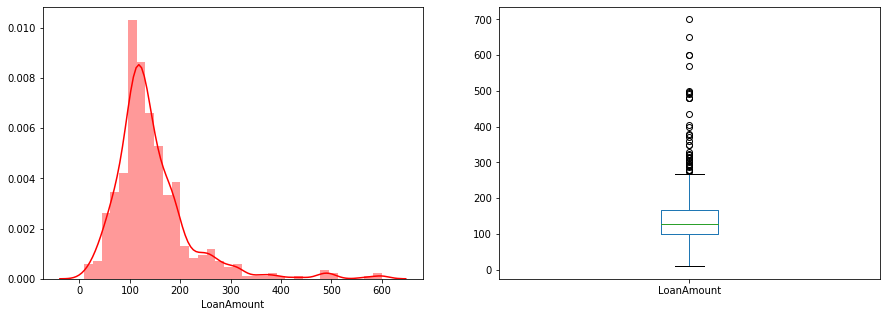

In [50]:
plt.subplot(1,2,1)
a = train_df.dropna()
sns.distplot(a["LoanAmount"],color='red');

plt.subplot(1,2,2)
train_df["LoanAmount"].plot.box(figsize=(15,5))

#### The distribution for LoanAmount is more or less normal, but outliers are present which will be corrected later.

### Feature: Loan_Amount_Term 

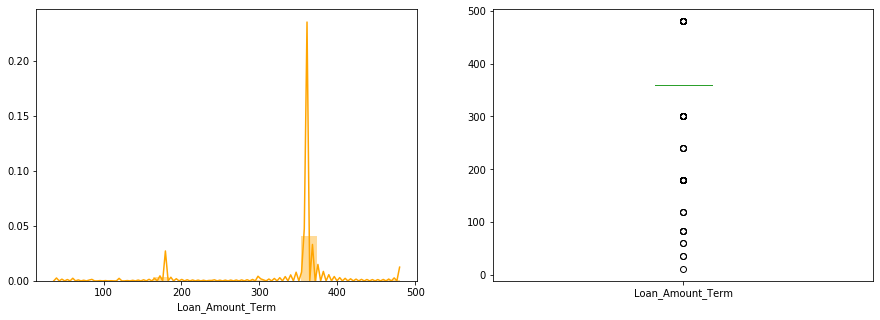

In [51]:
plt.subplot(1,2,1)
b = train_df.dropna()
sns.distplot(b["Loan_Amount_Term"],color='orange');

plt.subplot(1,2,2)
train_df["Loan_Amount_Term"].plot.box(figsize=(15,5))

#### The distribution for Loan_Amount_Term is more or less normal, but outliers are present which will be corrected later

### Relation between Gender & Loan_Status 

In [52]:
g = train_df.groupby(['Gender', 'Loan_Status']).Loan_Status.value_counts()
g

Gender  Loan_Status  Loan_Status
Female  N            N               37
        Y            Y               75
Male    N            N              150
        Y            Y              339
Name: Loan_Status, dtype: int64

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


Text(0, 0.5, 'Number of people')

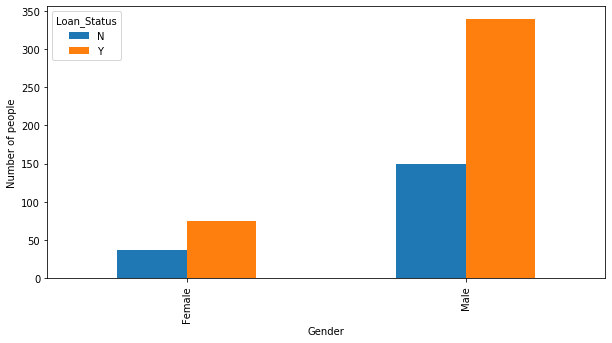

In [53]:
#sns.barplot(data=g, x='Gender', hue='Loan_status')
#---------- Alternative way ---------------

print(pd.crosstab(train_df["Gender"],train_df["Loan_Status"]))
Gender = pd.crosstab(train_df["Gender"],train_df["Loan_Status"])
Gender.plot(kind="bar",stacked=False,figsize=(10,5))
plt.xlabel("Gender")
plt.ylabel("Number of people")

#### From the above plot, it can be concluded that the number of males with loan approvals is more than the number of females.

### Relation between Loan_Status and Dependents 

In [54]:
dep = pd.crosstab(train_df['Dependents'], train_df['Loan_Status'])
dep

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


Text(0, 0.5, 'Number of people')

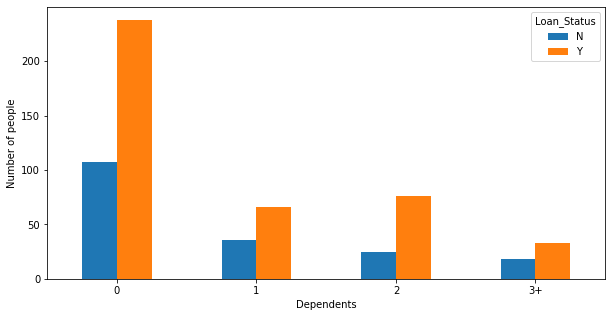

In [55]:
dep.plot.bar(figsize=(10,5), rot=0)
plt.xlabel('Dependents')
plt.ylabel('Number of people')

#### From the above plot it can be inferred that the people with zero dependents has the maximum chance of loan approval.

### Relation between Loan_Status and Married 

In [56]:
mar = pd.crosstab(train_df['Married'], train_df['Loan_Status'])
mar

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


Text(0, 0.5, 'Number of people')

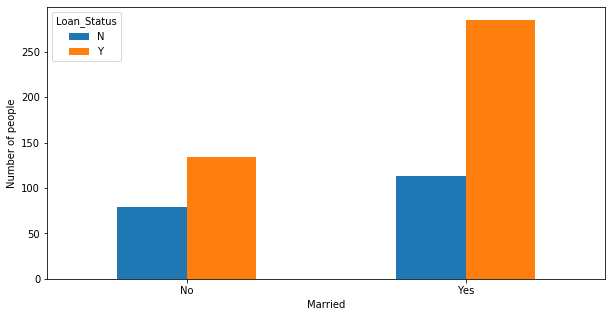

In [57]:
mar.plot.bar(figsize=(10,5), rot=0)
plt.xlabel('Married')
plt.ylabel('Number of people')

#### Married people tend to have a higher rate of loan approval

### Relation between Loan_Status and Education 

In [58]:
edu = pd.crosstab(train_df['Education'], train_df['Loan_Status'])
edu

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


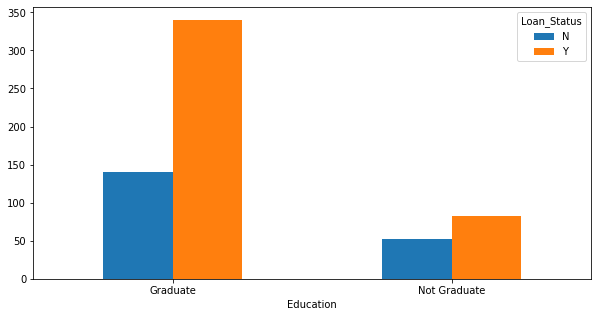

In [59]:
#edu.plot.bar(figsize=(10,5), rot=0)
edu.plot.bar(figsize=(10,5), rot=0)

#### Graduates have a higher chance of Loan Approval than non graduates. 

### Relation between Loan_Status and Credit_History 

In [60]:
ch = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
ch

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


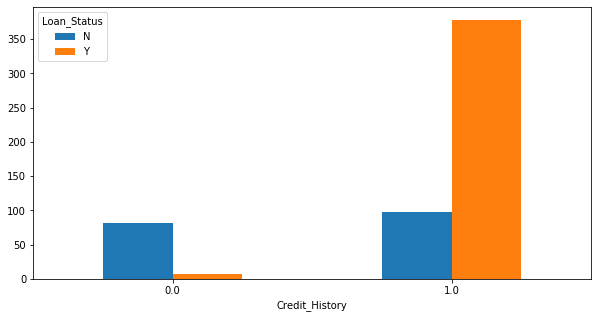

In [61]:
ch.plot.bar(figsize=(10,5), rot=0)

#### People with Credit History = 1 has a higher tendency of Loan Approval. 

### Relation between Loan_Status and Self_Employed

In [62]:
se = pd.crosstab(train_df['Self_Employed'], train_df['Loan_Status'])
se

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


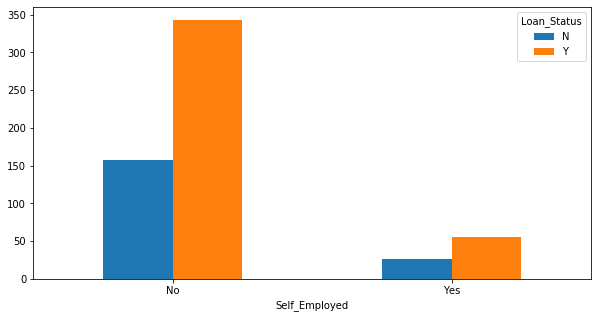

In [63]:
se.plot.bar(figsize=(10,5), rot=0)

#### People who are self employed ha s a lower chance of getting a loan approval than employed people.

### Relation between Loan_Status and Property_Area 

In [64]:
pa = pd.crosstab(train_df['Property_Area'], train_df['Loan_Status'])
pa

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


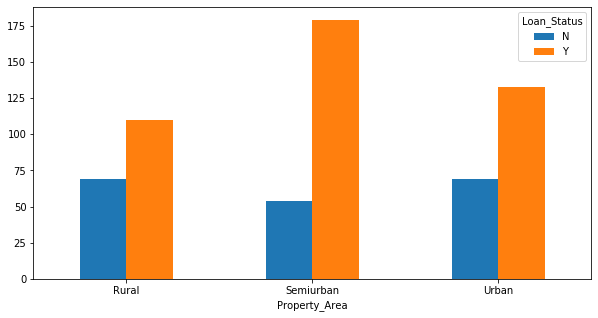

In [65]:
pa.plot.bar(figsize=(10,5), rot=0)

#### Semi-urban area has a higher tendency of Loan Approval than Urban & Rural Areas

## Data Cleaning

In [66]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [67]:
test_df['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [68]:
## The 3+ has to be removed and changed to 3.

train_df['Dependents'] = train_df['Dependents'].replace(to_replace='3+', value='3', inplace=False)
test_df['Dependents'] = test_df['Dependents'].replace(to_replace='3+', value='3', inplace=False)

In [69]:
test_df['Dependents'].value_counts()                         ## Testing the above codes.

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64

### Changing Loan_Status to categorical values. 

In [70]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [71]:
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y':1, 'N':0})

### Handling Null values

In [72]:
pd.DataFrame(train_df.isnull().sum())

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [73]:
pd.DataFrame(test_df.isnull().sum())

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [74]:
#Gender, Married, Dependents, Credit_History and Self_Employed features will be filled by the mode of the features.

train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)

test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)

In [75]:
# Loan_Amount_Term can also be replaced with the mode. Lets check if possible.
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [76]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)

In [77]:
## The Loan_Amount feature is a numerical one and it has outliers. So we use median to fill the null values.

train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)

In [78]:
## Checking if null values are still present or not in both the train and test sets.

train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [79]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### No Null values are present in the Train and Test set. 

### Outlier treatment

### Feature: LoanAmount 

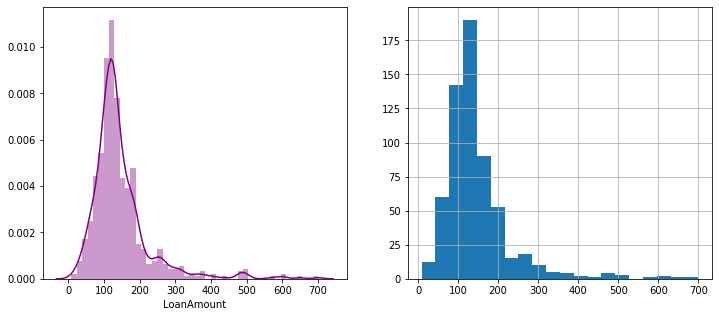

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(train_df["LoanAmount"], color='purple')

plt.subplot(1,2,2)
train_df['LoanAmount'].hist(bins=20)

In [81]:
## The presence of outliers has made a right skewed graph. So, we log transform the feature to normalize it.

train_df['LoanAmount'] = np.log(train_df['LoanAmount'])


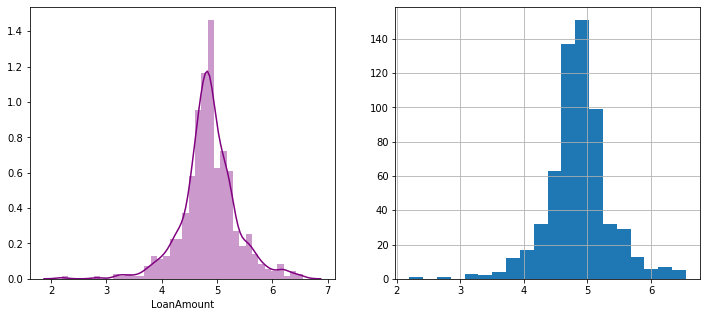

In [82]:
## Re - plottin the graphs to see the effect.

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(train_df["LoanAmount"], color='purple')

plt.subplot(1,2,2)
train_df['LoanAmount'].hist(bins=20)

#### The graphs look bell shaped and normalized. so we log transform in the test set as well. 

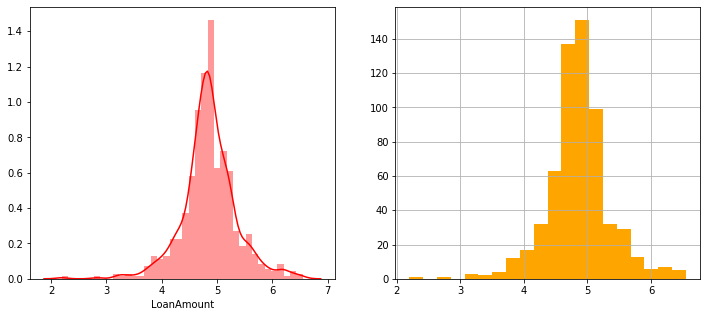

In [83]:
test_df['LoanAmount'] = np.log(test_df['LoanAmount'])

# Plotting the graphs for the test set below for Loanamount feature.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(train_df["LoanAmount"], color='red')

plt.subplot(1,2,2)
train_df['LoanAmount'].hist(bins=20,color='orange')

## Feature Engineering

#### Assumptions:

Total Income - We can combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.


### Engineered feature: TotalIncome

In [84]:
# train_df["TotalIncome"] = train_df["ApplicantIncome"] + train_df["CoapplicantIncome"]

In [85]:
# test_df["TotalIncome"] = test_df["ApplicantIncome"] + test_df["CoapplicantIncome"]

In [86]:
# train_df["TotalIncome"].head(3)

In [87]:
# test_df["TotalIncome"].head(3)

In [88]:
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# sns.distplot(train_df["TotalIncome"], color='purple')

# plt.subplot(1,2,2)
# train_df['TotalIncome'].hist(bins=20)

In [89]:
# # Log transforming to make the distribution curve look bell shaped.

# train_df['TotalIncome'] = np.log(train_df['TotalIncome'])

# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# sns.distplot(train_df["TotalIncome"], color='purple')

# plt.subplot(1,2,2)
# train_df['TotalIncome'].hist(bins=20)

In [90]:
# # Log Transform for the test set as well

# test_df['TotalIncome'] = np.log(test_df['TotalIncome'])

### Engineered Feature: EMI 

In [91]:
# train_df["EMI"] = train_df["LoanAmount"]/train_df["Loan_Amount_Term"]
# test_df["EMI"] = test_df["LoanAmount"]/test_df["Loan_Amount_Term"]
# train_df['EMI'].head(3)

In [92]:
# test_df['EMI'].head(3)

In [93]:
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# sns.distplot(train_df["EMI"], color='purple')

# plt.subplot(1,2,2)
# train_df['EMI'].hist(bins=20)

#### Adding the Engineered features - EMI and TotalIncome doesn't improve the model. Hence, code is blocked and not used in model building.

In [94]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,1


In [95]:
train_df['Gender'] = train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married'] = train_df['Married'].map({'Yes':1, 'No':0})
train_df['Education'] = train_df['Education'].map({'Graduate':1, 'Not Graduate':0})
train_df['Self_Employed'] = train_df['Self_Employed'].map({'Yes':1, 'No':0})
train_df['Property_Area'] = train_df['Property_Area'].map({'Semiurban':0, 'Urban':1, 'Rural':2})

test_df['Gender'] = test_df['Gender'].map({'Male':0, 'Female':1})
test_df['Married'] = test_df['Married'].map({'Yes':1, 'No':0})
test_df['Education'] = test_df['Education'].map({'Graduate':1, 'Not Graduate':0})
test_df['Self_Employed'] = test_df['Self_Employed'].map({'Yes':1, 'No':0})
test_df['Property_Area'] = test_df['Property_Area'].map({'Semiurban':0, 'Urban':1, 'Rural':2})

In [96]:
#Saving the Loan_ID in a seperate variable for submission file creation.

test_UID = test_df['Loan_ID']
test_UID.head()

0    LP001015
1    LP001022
2    LP001031
3    LP001035
4    LP001051
Name: Loan_ID, dtype: object

In [97]:
# Loan_ID seems to be irrelevant. So it is dropped.

train_df = train_df.drop("Loan_ID",axis=1)
test_df = test_df.drop("Loan_ID",axis=1)

train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,1,1
1,0,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,2,0
2,0,1,0,1,1,3000,0.0,4.189655,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,4.787492,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,4.948760,360.0,1.0,1,1


In [98]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,0,5720,0,4.700480,360.0,1.0,1
1,0,1,1,1,0,3076,1500,4.836282,360.0,1.0,1
2,0,1,2,1,0,5000,1800,5.337538,360.0,1.0,1
3,0,1,2,1,0,2340,2546,4.605170,360.0,1.0,1
4,0,0,0,0,0,3276,0,4.356709,360.0,1.0,1


## Model Building 

In [99]:
X_train = train_df.drop('Loan_Status', axis = 1)
y_train = train_df[['Loan_Status']]

In [100]:
X_train.shape

(614, 11)

In [101]:
X_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,1
1,0,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,4.189655,360.0,1.0,1


In [102]:
y_train.shape

(614, 1)

In [103]:
y_train.head(3)

,Loan_Status
0,1
1,0
2,1


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

In [105]:
# X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.25, random_state=42)

In [106]:
# # Logistic Regression

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_cv)
# logreg_score = logreg.accuracy_score(y_pred, y_cv) * 100
# logreg_score

In [107]:
# pred_test_logistic = logreg.predict(test_df)
# pred_test_logistic

In [108]:
# # Support Vector Machines

# svc = SVC()
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_cv)
# svc_score = round(svc.score(X_train, y_train) * 100, 2)
# svc_score

In [109]:
# # Decision Tree

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, y_train)
# y_pred = decision_tree.predict(X_cv)
# decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
# decision_tree_score

In [110]:
# # Random Forest

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, y_train)
# y_pred = random_forest.predict(X_test)
# random_forest.score(X_train, y_train)
# rand_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
# rand_forest_score

In [111]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [112]:
# Logistic Regression

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 81.27
Accuracy CV 10-Fold: 80.94


In [113]:
# k-Nearest Neighbours

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)

print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)


Accuracy: 73.13
Accuracy CV 10-Fold: 62.21


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [114]:
# Linear SVC

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)

print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 68.73
Accuracy CV 10-Fold: 57.65


In [115]:
# Decision Tree Classifier

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)

print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)


Accuracy: 100.0
Accuracy CV 10-Fold: 72.48


In [116]:
# Random Forest Classifier

train_pred_dt, acc_dt, acc_cv_rf = fit_ml_algo(RandomForestClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)

print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy: 98.7
Accuracy CV 10-Fold: 76.22


# Model Results 

### We take the Cross Validation Score 

In [117]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Linear SVC', 
              'Decision Tree', 'Random Forest Classifier'
              ],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_rf
        
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
1,Logistic Regression,80.94
4,Random Forest Classifier,76.22
3,Decision Tree,72.48
0,KNN,62.21
2,Linear SVC,57.65


### Logistic Regression has the maximum cross validation score so we use it.

In [118]:
t_logreg = LogisticRegression()
t_logreg.fit(X_train, y_train)
t_pred = t_logreg.predict(test_df)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
submission = pd.DataFrame({
        "LoanID": test_UID,
        "Loan_Status": t_pred
    })

submission.head(10)

,LoanID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1
